# **Optical Character Recognition Sirekap Barudak Bojongsoang**

# **Setup**

In [32]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
import keras
import glob
import shutil
import pprint

from PIL import Image, ImageEnhance

In [33]:
TRAIN_PATH      = 'Train'
TEST_PATH       = 'Test'

TRAIN_SUARA01   = 'Train/suara01'
TRAIN_SUARA02   = 'Train/suara02'
TRAIN_SUARA03   = 'Train/suara03'
TEST_SUARA01    = 'Test/suara01'
TEST_SUARA02    = 'Test/suara02'
TEST_SUARA03    = 'Test/suara03'

for folder in ["suara01", "suara02", "suara03"]:
    train_output_folder = os.path.join(TRAIN_PATH, folder)
    test_output_folder = os.path.join(TEST_PATH, folder)
    
    if not os.path.exists(train_output_folder):
        os.makedirs(train_output_folder, exist_ok=True)
    if not os.path.exists(test_output_folder):
        os.makedirs(test_output_folder, exist_ok=True)

# **Managing of Image**

In [34]:
def format_number(number):
    if number < 10:
        return f"TPS_00{number}.jpg"
    elif number < 100:
        return f"TPS_0{number}.jpg"
    else:
        return f"TPS_{number}.jpg"

## **Preprocess Resolution of Image**

In [35]:
# Function to check image resolution
def check_image_resolution(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
        return width < 400 and height < 400

def check_image(path):
    list_img = []
    for folder, _, files in os.walk(path):
        for file in files:
            if file.endswith('.jpg'):
                image_path = os.path.join(folder, file)
                if check_image_resolution(image_path):
                    list_img.append(image_path.split('\\')[1])
    
    return list_img

train_img_low_res = check_image(TRAIN_PATH)            
test_img_low_res = check_image(TEST_PATH)

print("All train image slow resolutions: \n\t", train_img_low_res)
print("All test image slow resolutions: \n\t", test_img_low_res)

All train image slow resolutions: 
	 ['TPS_004.jpg', 'TPS_022.jpg', 'TPS_031.jpg', 'TPS_044.jpg', 'TPS_049.jpg', 'TPS_051.jpg', 'TPS_052.jpg', 'TPS_065.jpg', 'TPS_076.jpg', 'TPS_093.jpg', 'TPS_105.jpg', 'TPS_110.jpg', 'TPS_112.jpg', 'TPS_115.jpg', 'TPS_118.jpg', 'TPS_130.jpg', 'TPS_150.jpg', 'TPS_152.jpg', 'TPS_153.jpg', 'TPS_157.jpg', 'TPS_192.jpg', 'TPS_193.jpg', 'TPS_228.jpg', 'TPS_230.jpg', 'TPS_244.jpg', 'TPS_245.jpg', 'TPS_250.jpg', 'TPS_255.jpg', 'TPS_263.jpg', 'TPS_266.jpg', 'TPS_290.jpg', 'TPS_311.jpg', 'TPS_312.jpg', 'TPS_318.jpg', 'TPS_328.jpg', 'TPS_343.jpg', 'TPS_384.jpg', 'TPS_398.jpg', 'TPS_400.jpg', 'TPS_410.jpg', 'TPS_438.jpg', 'TPS_443.jpg', 'TPS_455.jpg', 'TPS_460.jpg', 'TPS_467.jpg', 'TPS_474.jpg', 'TPS_484.jpg', 'TPS_486.jpg', 'TPS_494.jpg', 'TPS_499.jpg']
All test image slow resolutions: 
	 ['TPS_504.jpg', 'TPS_506.jpg', 'TPS_510.jpg', 'TPS_513.jpg', 'TPS_516.jpg', 'TPS_540.jpg', 'TPS_545.jpg', 'TPS_548.jpg', 'TPS_552.jpg', 'TPS_556.jpg', 'TPS_561.jpg', 'TPS_562.j

In [36]:
def resize_image(list_image, path, next=None):
    if next is not None:
        for image in list_image:
            image_path = os.path.join(path, image)
            img = cv2.imread(image_path)
            img = cv2.resize(img, (820, 960))
            cv2.imwrite(image_path, img)
            shutil.move(image_path, os.path.join(path, image))
            print(f"Image {image} resized to 820 x 960")
        
resize_image(train_img_low_res, TRAIN_PATH)
resize_image(test_img_low_res, TEST_PATH)

In [37]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def preprocess_image(image_path):
#     image = cv2.imread(image_path)
#     image = cv2.fastNlMeansDenoisingColored(image, None, 2, 3, 7, 15)
#     image = np.uint8(cv2.pow(image / 255.0, 1.7) * 255)
#     cv2.imwrite("image.jpg", image)
    
#     return image

# image_path = "Train/TPS_400.jpg"
# image = cv2.imread(image_path)

# fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# axes[0].set_title('Original Image')
# axes[0].axis('off')

# axes[1].imshow(preprocess_image(image_path), cmap='gray')
# axes[1].set_title('Preprocessed Image')
# axes[1].axis('off')

# plt.show()

## **Preprocess Rotation of Image**

In [38]:
def list_images(folder_path):
    image_files = []
    for file_name in os.listdir(folder_path):
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            image_files.append(file_name)
    return image_files

train_images = list_images(TRAIN_PATH)
test_images = list_images(TEST_PATH)

In [39]:
def check_rotated(image_list, folder_path, next=None):
    if next is not None:
        for image_name in image_list:
            image_path = os.path.join(folder_path, image_name)
            
            obj_img = cv2.imread(TRAIN_PATH + "/TPS_002.jpg") 
            obj_img = cv2.resize(obj_img, (800, 500), interpolation=cv2.INTER_CUBIC)
            obj_img = cv2.bitwise_not(obj_img)
            obj_img = cv2.cvtColor(obj_img, cv2.COLOR_BGR2GRAY)
            
            comp_img = cv2.imread(image_path)
            comp_img = cv2.resize(comp_img, (800, 500), interpolation=cv2.INTER_CUBIC)
            comp_img = cv2.bitwise_not(comp_img)
            comp_img = cv2.cvtColor(comp_img, cv2.COLOR_BGR2GRAY)
            
            sift = cv2.SIFT_create()

            _, des1 = sift.detectAndCompute(obj_img, None)
            _, des2 = sift.detectAndCompute(comp_img, None)

            bf = cv2.BFMatcher()
            matches = bf.knnMatch(des1, des2, k=2)

            good_matches = []
            for m, n in matches:
                if m.distance < 0.6 * n.distance:
                    good_matches.append([m])

            if len(good_matches) >= 50:
                continue
            else:
                print(f"Gambar {image_name} terdeteksi dirotasi. ({len(good_matches)})")

check_rotated(train_images, TRAIN_PATH)
check_rotated(test_images, TEST_PATH)

In [40]:
rotate_train = [15, 69, 85, 108, 207, 222, 270, 422, 430, 468]
rotate_test  = [537, 539, 603, 660, 699]

list_rotate_train = [format_number(number) for number in rotate_train]
list_rotate_test = [format_number(number) for number in rotate_test]

print(f"List Rotate Train: \n {list_rotate_train}")
print(f"List Rotate Test: \n {list_rotate_test}")

List Rotate Train: 
 ['TPS_015.jpg', 'TPS_069.jpg', 'TPS_085.jpg', 'TPS_108.jpg', 'TPS_207.jpg', 'TPS_222.jpg', 'TPS_270.jpg', 'TPS_422.jpg', 'TPS_430.jpg', 'TPS_468.jpg']
List Rotate Test: 
 ['TPS_537.jpg', 'TPS_539.jpg', 'TPS_603.jpg', 'TPS_660.jpg', 'TPS_699.jpg']


In [41]:
def rotate_images(image_list, folder_path, next=None):
    if next is not None:
        for image_name in image_list:
            image_path = os.path.join(folder_path, image_name)
            img = cv2.imread(image_path)
            if img is not None:
                rotate_img = cv2.rotate(img, cv2.ROTATE_180)
                save_path = os.path.join(folder_path, image_name)
                cv2.imwrite(save_path, rotate_img)
                print(f"Image {image_name} rotate and saved as {os.path.basename(save_path)}")
            else:
                print(f"Failed to read image {image_name}")

rotate_images(list_rotate_train, TRAIN_PATH)
rotate_images(list_rotate_test, TEST_PATH)

## **Preprocess Brightness of Image**

In [42]:
# train_gelap = [11,12,13,37,39,40,60,61,78,166,167,169,179,188,197,198,205,219,221,234,273,322,344,347,372,379,380,382,394,399,442,447,448,464]
# test_gelap = [541,547,553,577,589,598,618,619,653,658,667,692,693]

# list_train_gelap = [format_number(number) for number in train_gelap]
# list_test_gelap = [format_number(number) for number in test_gelap]

# print(f"List Train Gelap: \n {list_train_gelap}")
# print(f"List Test Gelap: \n {list_test_gelap}")

In [43]:
# def brightness_images(image_list, folder_path, factor=2, next=None):
#     if next is not None:
#         for image_name in image_list:
#             image_path = os.path.join(folder_path, image_name)
#             if os.path.exists(image_path):
#                 image = Image.open(image_path)
#                 enhancer = ImageEnhance.Brightness(image)
#                 enhanced_image = enhancer.enhance(factor)
#                 enhanced_image.save(os.path.join(folder_path, f"{image_name}"))
#                 print(f"Image {image_name} contrast enhanced and saved as {image_name}")
#             else:
#                 print(f"Failed to read image {image_name}")

# brightness_images(list_train_gelap, TRAIN_PATH)
# brightness_images(list_test_gelap, TEST_PATH, next=True)

## **Preprocess Skewed of Image**

In [44]:
def preprocess_of_skewed_image(image_list, path, angle, plot=False, next=True):
    if next is not None:
        for image_name in image_list:
            image_path = os.path.join(path, image_name)
            image = cv2.imread(image_path)
            height, width, _ = image.shape
            
            rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1.0)
            rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
            save_path = os.path.join(path, image_name)
            cv2.imwrite(save_path, rotated_image)
            print(f"Image {image_name} preprocess skewed and saved as {os.path.basename(save_path)}")

            if plot:
                _, axes = plt.subplots(1, 2, figsize=(10, 5))
            
                axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                axes[0].set_title('Original Image')
                axes[0].axis('off')
                
                axes[1].imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
                axes[1].set_title('Rotated Image')
                axes[1].axis('off')
                
                plt.show()

In [45]:
train_skew_2 = [36, 84, 87, 94, 148, 154, 223, 245, 260, 307, 333, 351, 352]
train_skew_minus2 = [19, 18, 114, 230, 268, 308, 337, 410, 414, 432, 493]
train_skew_3 = [14, 17, 21, 112, 120, 127, 198, 246, 254, 327, 329, 457]
train_skew_minus3 = [35, 65, 75, 116, 149, 185, 206, 227, 369, 453, 477]

list_train_skew_2 = [format_number(number) for number in train_skew_2]
list_train_skew_minus2 = [format_number(number) for number in train_skew_minus2]
list_train_skew_3 = [format_number(number) for number in train_skew_3]
list_train_skew_minus3 = [format_number(number) for number in train_skew_minus3]

print(f"List train skew 2: \n {list_train_skew_2}")
print(f"List train skew minus 2: \n {list_train_skew_minus2}")
print(f"List train skew 3: \n {list_train_skew_3}")
print(f"List train skew minus 3: \n {list_train_skew_minus3}")

List train skew 2: 
 ['TPS_036.jpg', 'TPS_084.jpg', 'TPS_087.jpg', 'TPS_094.jpg', 'TPS_148.jpg', 'TPS_154.jpg', 'TPS_223.jpg', 'TPS_245.jpg', 'TPS_260.jpg', 'TPS_307.jpg', 'TPS_333.jpg', 'TPS_351.jpg', 'TPS_352.jpg']
List train skew minus 2: 
 ['TPS_019.jpg', 'TPS_018.jpg', 'TPS_114.jpg', 'TPS_230.jpg', 'TPS_268.jpg', 'TPS_308.jpg', 'TPS_337.jpg', 'TPS_410.jpg', 'TPS_414.jpg', 'TPS_432.jpg', 'TPS_493.jpg']
List train skew 3: 
 ['TPS_014.jpg', 'TPS_017.jpg', 'TPS_021.jpg', 'TPS_112.jpg', 'TPS_120.jpg', 'TPS_127.jpg', 'TPS_198.jpg', 'TPS_246.jpg', 'TPS_254.jpg', 'TPS_327.jpg', 'TPS_329.jpg', 'TPS_457.jpg']
List train skew minus 3: 
 ['TPS_035.jpg', 'TPS_065.jpg', 'TPS_075.jpg', 'TPS_116.jpg', 'TPS_149.jpg', 'TPS_185.jpg', 'TPS_206.jpg', 'TPS_227.jpg', 'TPS_369.jpg', 'TPS_453.jpg', 'TPS_477.jpg']


In [46]:
preprocess_of_skewed_image(list_train_skew_2, TRAIN_PATH, 2)
preprocess_of_skewed_image(list_train_skew_minus2, TRAIN_PATH, -2)
preprocess_of_skewed_image(list_train_skew_3, TRAIN_PATH, 3)
preprocess_of_skewed_image(list_train_skew_minus3, TRAIN_PATH, -3)

Image TPS_036.jpg preprocess skewed and saved as TPS_036.jpg
Image TPS_084.jpg preprocess skewed and saved as TPS_084.jpg
Image TPS_087.jpg preprocess skewed and saved as TPS_087.jpg
Image TPS_094.jpg preprocess skewed and saved as TPS_094.jpg
Image TPS_148.jpg preprocess skewed and saved as TPS_148.jpg
Image TPS_154.jpg preprocess skewed and saved as TPS_154.jpg
Image TPS_223.jpg preprocess skewed and saved as TPS_223.jpg
Image TPS_245.jpg preprocess skewed and saved as TPS_245.jpg
Image TPS_260.jpg preprocess skewed and saved as TPS_260.jpg
Image TPS_307.jpg preprocess skewed and saved as TPS_307.jpg
Image TPS_333.jpg preprocess skewed and saved as TPS_333.jpg
Image TPS_351.jpg preprocess skewed and saved as TPS_351.jpg
Image TPS_352.jpg preprocess skewed and saved as TPS_352.jpg
Image TPS_019.jpg preprocess skewed and saved as TPS_019.jpg
Image TPS_018.jpg preprocess skewed and saved as TPS_018.jpg
Image TPS_114.jpg preprocess skewed and saved as TPS_114.jpg
Image TPS_230.jpg prepro

In [47]:
test_skew_2 = [539, 604, 669, 681, 682]
test_skew_minus2 = [507, 512, 554, 588, 589, 628, 687]
test_skew_3 = [640, 645, 658]
test_skew_minus3 = [532]

list_test_skew_2 = [format_number(number) for number in test_skew_2]
list_test_skew_minus2 = [format_number(number) for number in test_skew_minus2]
list_test_skew_3 = [format_number(number) for number in test_skew_3]
list_test_skew_minus3 = [format_number(number) for number in test_skew_minus3]

print(f"List test skew 2: \n {list_test_skew_2}")
print(f"List test skew minus 2: \n {list_test_skew_minus2}")
print(f"List test skew 3: \n {list_test_skew_3}")
print(f"List test skew minus 3: \n {list_test_skew_minus3}")

List test skew 2: 
 ['TPS_539.jpg', 'TPS_604.jpg', 'TPS_669.jpg', 'TPS_681.jpg', 'TPS_682.jpg']
List test skew minus 2: 
 ['TPS_507.jpg', 'TPS_512.jpg', 'TPS_554.jpg', 'TPS_588.jpg', 'TPS_589.jpg', 'TPS_628.jpg', 'TPS_687.jpg']
List test skew 3: 
 ['TPS_640.jpg', 'TPS_645.jpg', 'TPS_658.jpg']
List test skew minus 3: 
 ['TPS_532.jpg']


In [48]:
preprocess_of_skewed_image(list_test_skew_2, TEST_PATH, 2)
preprocess_of_skewed_image(list_test_skew_minus2, TEST_PATH, -2)
preprocess_of_skewed_image(list_test_skew_3, TEST_PATH, 3)
preprocess_of_skewed_image(list_test_skew_minus3, TEST_PATH, -3)

Image TPS_539.jpg preprocess skewed and saved as TPS_539.jpg
Image TPS_604.jpg preprocess skewed and saved as TPS_604.jpg
Image TPS_669.jpg preprocess skewed and saved as TPS_669.jpg
Image TPS_681.jpg preprocess skewed and saved as TPS_681.jpg
Image TPS_682.jpg preprocess skewed and saved as TPS_682.jpg
Image TPS_507.jpg preprocess skewed and saved as TPS_507.jpg
Image TPS_512.jpg preprocess skewed and saved as TPS_512.jpg
Image TPS_554.jpg preprocess skewed and saved as TPS_554.jpg
Image TPS_588.jpg preprocess skewed and saved as TPS_588.jpg
Image TPS_589.jpg preprocess skewed and saved as TPS_589.jpg
Image TPS_628.jpg preprocess skewed and saved as TPS_628.jpg
Image TPS_687.jpg preprocess skewed and saved as TPS_687.jpg
Image TPS_640.jpg preprocess skewed and saved as TPS_640.jpg
Image TPS_645.jpg preprocess skewed and saved as TPS_645.jpg
Image TPS_658.jpg preprocess skewed and saved as TPS_658.jpg
Image TPS_532.jpg preprocess skewed and saved as TPS_532.jpg


# **Managing of Labels**

## **Cropping Image Label**

In [49]:
def preprocess_image_1(image):
    image = cv2.resize(image, (800, 500), interpolation=cv2.INTER_CUBIC)
    
    height, width, _ = image.shape
    part_height = height // 3
    part_width = width // 4

    part1 = image[:part_height, part_width*3:]
    part2 = image[part_height:part_height*2, part_width*3:]
    part3 = image[part_height*2:, part_width*3:]

    return part1, part2, part3

def preprocess_image_2(image):
    image = cv2.resize(image, (800, 500), interpolation=cv2.INTER_CUBIC)
    height, _, _ = image.shape

    cropped_image = image[:height//2, :]

    return cropped_image

def preprocess_image_3(image):
    image = cv2.resize(image, (800, 500), interpolation=cv2.INTER_CUBIC)
    height, width, _ = image.shape

    cropped_image = image[height//3:, width//6:]
    
    return cropped_image

def preprocess_image_4(image):
    image = cv2.resize(image, (800, 500), interpolation=cv2.INTER_CUBIC)
    height, width, _ = image.shape

    part_width = width // 8

    cropped_image = image[height//20:height//3, part_width:]

    return cropped_image

def preprocess_image_5(image):
    image = cv2.resize(image, (800, 500), interpolation=cv2.INTER_CUBIC)
    height, _, _ = image.shape

    cropped_image = image[height//5:int(0.8 * height), :]
    return cropped_image

def final_preprocess(image):
    image = cv2.resize(image, (800, 250), interpolation=cv2.INTER_CUBIC)
  
    """ 
    Langkah langkah preprocess nya
    1. Converted grey scale
    2. Binarized image
    3. Noised removed
    """
    
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    noise_removed_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
    image = cv2.resize(noise_removed_image, (800, 250), interpolation=cv2.INTER_CUBIC)
    
    return image

In [50]:
def save_cropped_images_1(image_path, save_dir):
    image = cv2.imread(image_path)
    part1, part2, part3 = preprocess_image_1(image)

    image_name = os.path.basename(image_path)

    cv2.imwrite(os.path.join(save_dir, 'suara01', image_name), part1)
    cv2.imwrite(os.path.join(save_dir, 'suara02', image_name), part2)
    cv2.imwrite(os.path.join(save_dir, 'suara03', image_name), part3)
    
def save_cropped_images_2(image_path, save_dir, name_dir):
    image = cv2.imread(image_path)
    if name_dir == "bukan 03":
        image = preprocess_image_2(image)
        image = preprocess_image_3(image)
        image = preprocess_image_2(image)
        image = final_preprocess(image)
    if name_dir == "ternyata 03":
        image = preprocess_image_4(image)
        image = preprocess_image_5(image)
        image = final_preprocess(image)
    
    image_name = os.path.basename(image_path)
    
    cv2.imwrite(os.path.join(save_dir, image_name), image)

In [51]:
def save_temporary_images(path):
    data = glob.glob(os.path.join(path, '*.jpg'))
    for image_path in data:
        save_cropped_images_1(image_path, path)

def save_images(path, name_dir):
    data = glob.glob(os.path.join(path, '*.jpg'))
    for image_path in data:
        save_cropped_images_2(image_path, path, name_dir)

In [52]:
def preprocess_train(next=True):
    if next is not None:
        save_temporary_images(TRAIN_PATH)
        save_images(TRAIN_SUARA01, "bukan 03")        
        save_images(TRAIN_SUARA02, "bukan 03")        
        save_images(TRAIN_SUARA03, "ternyata 03")        

In [53]:
def preprocess_test(next=True):
    if next is not None: 
        save_temporary_images(TEST_PATH)
        save_images(TEST_SUARA01, "bukan 03")        
        save_images(TEST_SUARA02, "bukan 03")        
        save_images(TEST_SUARA03, "ternyata 03")

In [54]:
preprocess_train()
preprocess_test()

## **Preprocess Label**

In [55]:
label = pd.read_csv('train_label.csv')

suara01 = label[['tps', 'suara_paslon_1']].copy()
suara02 = label[['tps', 'suara_paslon_2']].copy()
suara03 = label[['tps', 'suara_paslon_3']].copy()

suara01['suara_paslon_1'] = suara01['suara_paslon_1'].astype('str')
suara02['suara_paslon_2'] = suara02['suara_paslon_2'].astype('str')
suara03['suara_paslon_3'] = suara03['suara_paslon_3'].astype('str')

def add_X(df: pd.DataFrame, label: str) -> pd.DataFrame:
    df[label] = df[label].apply(lambda x: 'X' * (3 - len(x)) + x if len(x) < 3 else x)
    return df

suara01 = add_X(suara01, 'suara_paslon_1')
suara02 = add_X(suara02, 'suara_paslon_2')
suara03 = add_X(suara03, 'suara_paslon_3')

In [56]:
train_label = suara01['suara_paslon_1'].tolist() + suara02['suara_paslon_2'].tolist()
test_label  = suara03['suara_paslon_3'].tolist()

In [57]:
for folder in ["_train", "_test", 'temp']:
    if not os.path.exists(folder):
        os.makedirs(folder, exist_ok=True)

In [58]:
TRAIN_PATH_ = '_train'
TEST_PATH_  = '_test'
TEMP = 'temp'

if os.path.exists(TRAIN_PATH_):
    shutil.rmtree(TRAIN_PATH_)

if os.path.exists(TEST_PATH_):
    shutil.rmtree(TEST_PATH_)

if os.path.exists(TEMP):
    shutil.rmtree(TEMP)

shutil.copytree('Train/suara01', TRAIN_PATH_, dirs_exist_ok=True)
shutil.copytree('Train/suara02', TEMP, dirs_exist_ok=True)
shutil.copytree('Train/suara03', TEST_PATH_, dirs_exist_ok=True)

def rename_image(path: str, start: int):
    num = start
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        os.rename(img_path, os.path.join(path, 'image_{}.jpg'.format(num)))
        num += 1

rename_image(TRAIN_PATH_, 1)
rename_image(TEST_PATH_, 1)
rename_image(TEMP, 501)

In [59]:
for img_path in glob.glob(os.path.join(TEMP, '*.jpg')):
    shutil.move(img_path, TRAIN_PATH_)
    
if os.path.exists(TEMP):
    shutil.rmtree(TEMP)

# **Data Preprocessing**

## **Splitting Image**

In [60]:
TRAIN_PATH_ = '_train/'
TEST_PATH_  = '_test/'

In [61]:
def sort_key(path):
    return int(path.split('_')[-1].split('.')[0])

all_train_paths = sorted(glob.glob(TRAIN_PATH_ + "*"), key=sort_key)
all_valid_paths = sorted(glob.glob(TEST_PATH_ + "*"), key=sort_key)

print(f'Train file paths : \n\t{all_train_paths[:5]}')
print(f'Valid file paths : \n\t{all_valid_paths[:5]}')

Train file paths : 
	['_train\\image_1.jpg', '_train\\image_2.jpg', '_train\\image_3.jpg', '_train\\image_4.jpg', '_train\\image_5.jpg']
Valid file paths : 
	['_test\\image_1.jpg', '_test\\image_2.jpg', '_test\\image_3.jpg', '_test\\image_4.jpg', '_test\\image_5.jpg']


In [62]:
all_train_labels = train_label
all_valid_labels = test_label

print(f'Train file labels: \n\t{all_train_labels[:5]}')
print(f'Valid file labels: \n\t{all_valid_labels[:5]}')

Train file labels: 
	['159', '112', '173', '207', '213']
Valid file labels: 
	['XX2', 'XX2', 'XX3', 'XX3', 'XX4']


In [63]:
chars = []
for word in all_train_labels:
    for char in word:
        chars.append(char)
        
characters = sorted(list(set(chars)))

print("Number of unique characters: ", len(characters))
print("Example of characters: ", characters)

Number of unique characters:  11
Example of characters:  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'X']


In [64]:
char_to_num = keras.layers.StringLookup(
    vocabulary=characters, 
    mask_token=None
)

num_to_char = keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), 
    invert=True,
    mask_token=None
)

In [65]:
def preprocess_img(path: str) -> tf.Tensor:
    image = tf.io.read_file(path)
    image = tf.image.decode_png(image, channels=1)
    image = tf.image.convert_image_dtype(image=image, dtype=tf.float32)
    image = tf.image.resize(images=image, size=(64, 200))
    image = tf.transpose(a=image, perm=[1, 0, 2])
    image = tf.cast(image, tf.float32)
    return image

In [66]:
def preprocess_labels(label: str) -> tf.Tensor:
    label = tf.strings.unicode_split(label, input_encoding="UTF-8")
    label = char_to_num(label)
    return label

In [67]:
def load_dataset(path: str, label: str) -> dict:
    image = preprocess_img(path=path)
    label = preprocess_labels(label=label)
    return {
        "image": image,
        "label": label
    }

In [68]:
train_ds = tf.data.Dataset.from_tensor_slices((
    np.array(all_train_paths), np.array(all_train_labels)
)).shuffle(1000).repeat(2).map(
    map_func=load_dataset, 
    num_parallel_calls=tf.data.experimental.AUTOTUNE
).batch(batch_size=16).prefetch(tf.data.experimental.AUTOTUNE)

valid_ds = tf.data.Dataset.from_tensor_slices((
    np.array(all_valid_paths), np.array(all_valid_labels)
)).map(
    map_func=load_dataset, 
    num_parallel_calls=tf.data.experimental.AUTOTUNE
).batch(batch_size=16).prefetch(tf.data.experimental.AUTOTUNE)

In [69]:
print(f'Training dataset: {len(train_ds)*16}')
print(f'Validation dataset: {len(valid_ds)*16}')

Training dataset: 2000
Validation dataset: 512


## **Data Visualization**

In [70]:
def decode_label(label) -> str:
    label = num_to_char(label)
    label = tf.strings.reduce_join(label).numpy().decode('utf8')
    return label

In [71]:
def data_visualization(data: tf.data.Dataset, model=None, decode_fn=None, grid=[4, 4], figsize=(20, 10), cmap='binary'):
    n_rows, n_cols = grid
    plt.figure(figsize=figsize)
    
    data = next(iter(data))
    images, labels = data['image'], data['label']
    
    if model is not None:
        pred_labels = decode_fn(model.predict(images))
        
    for image_number, (image, label) in enumerate(zip(images, labels)):
        
        if model is not None:
            title = f'True: {decode_label(label)}\nPred: {pred_labels[image_number]}'
        else:
            title = f'{decode_label(label)}'
        
        plt.subplot(n_rows, n_cols, image_number + 1)
        plt.imshow(tf.transpose(tf.squeeze(image)), cmap=cmap)
        plt.axis('off')
        plt.title(title)
        
    plt.show()

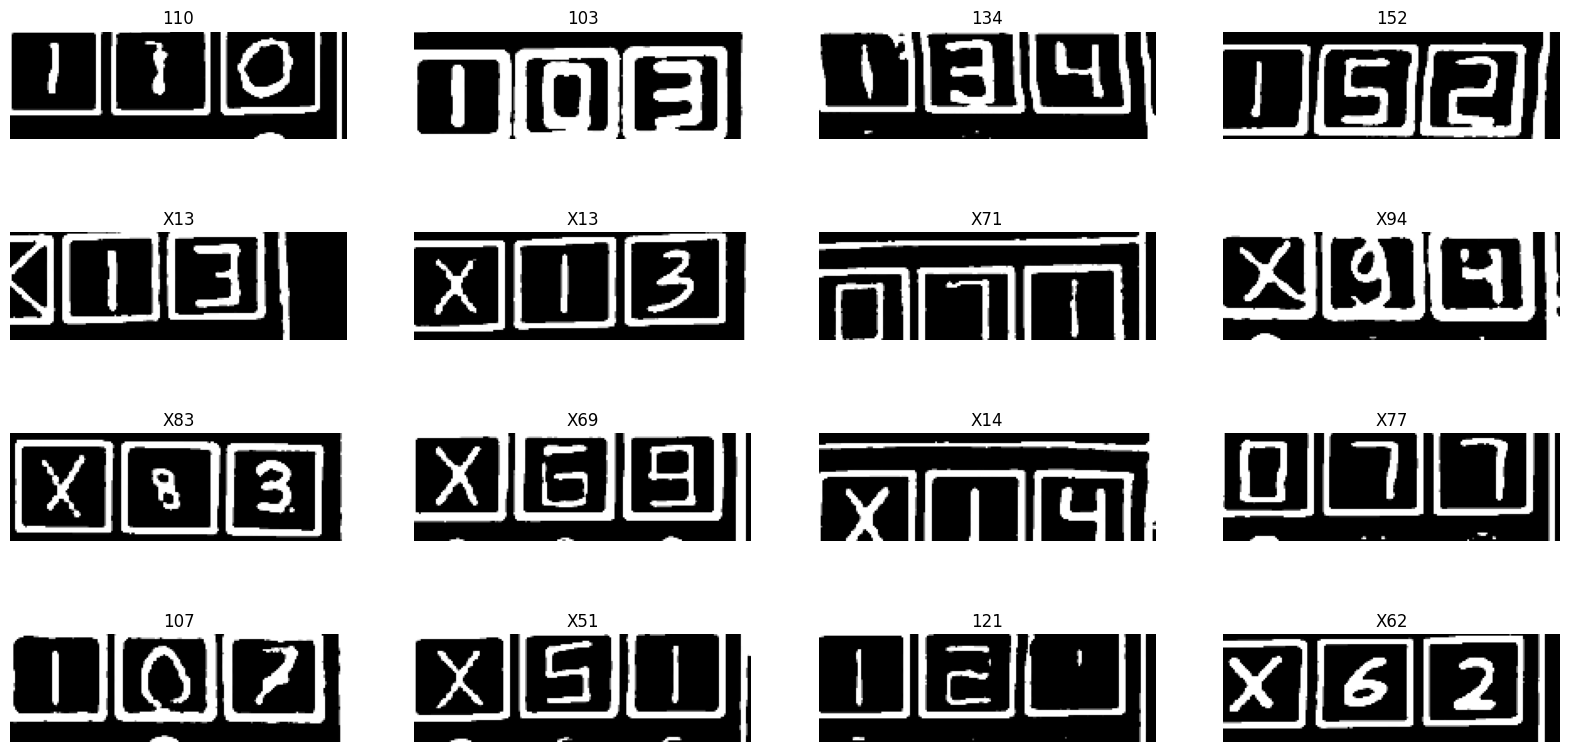

In [72]:
data_visualization(data=train_ds)

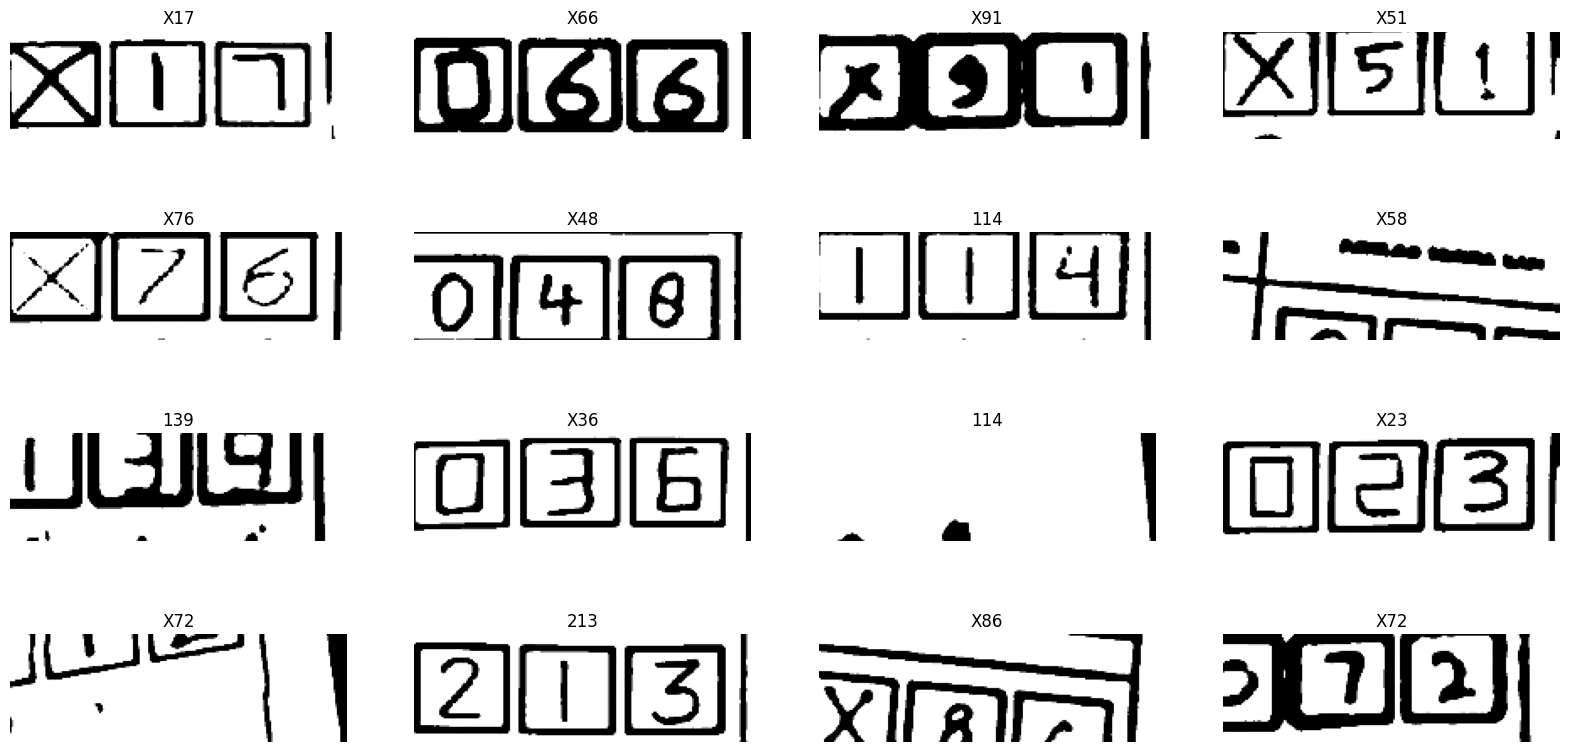

In [73]:
data_visualization(data=train_ds, cmap='grey')

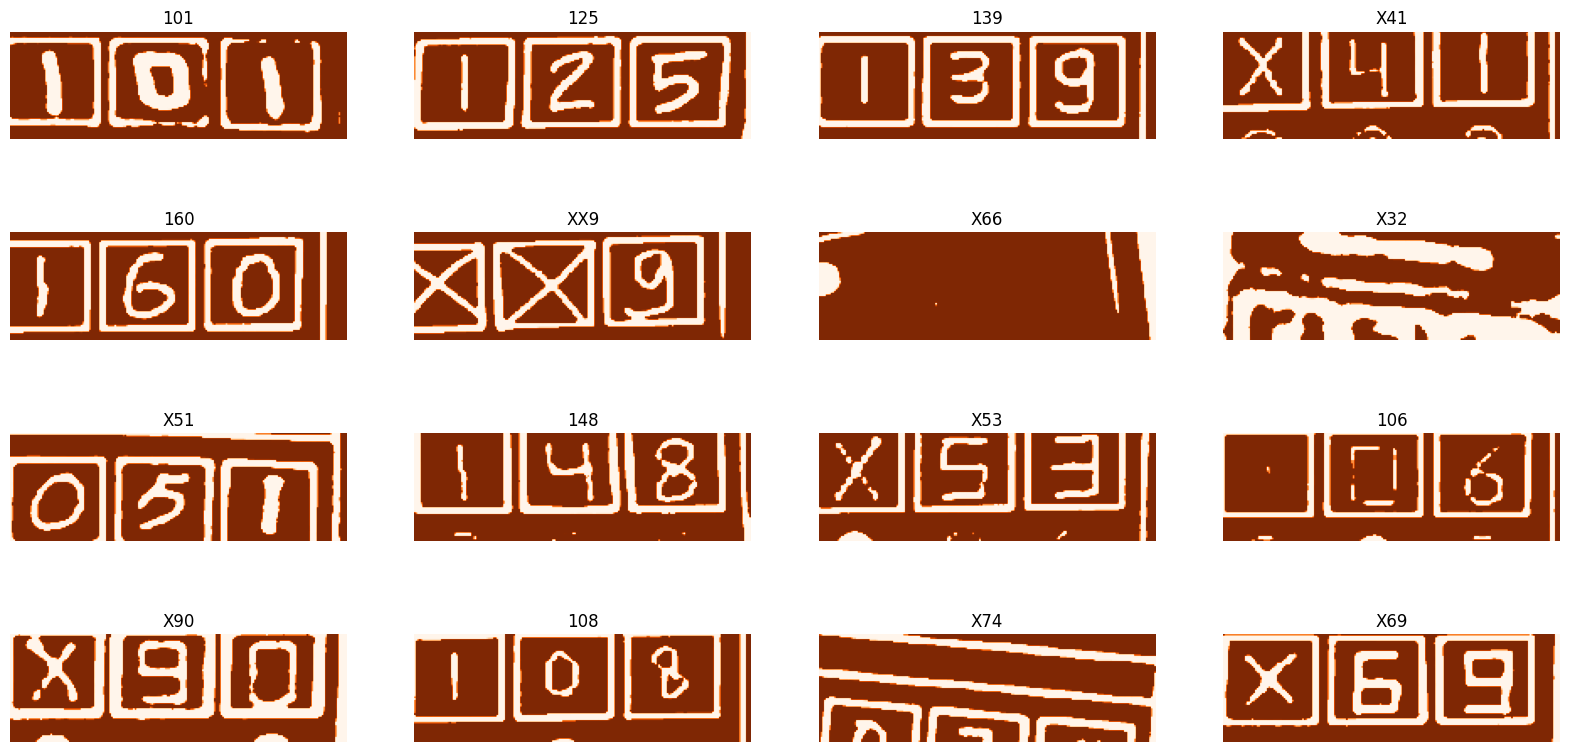

In [74]:
data_visualization(data=train_ds, cmap='Oranges')

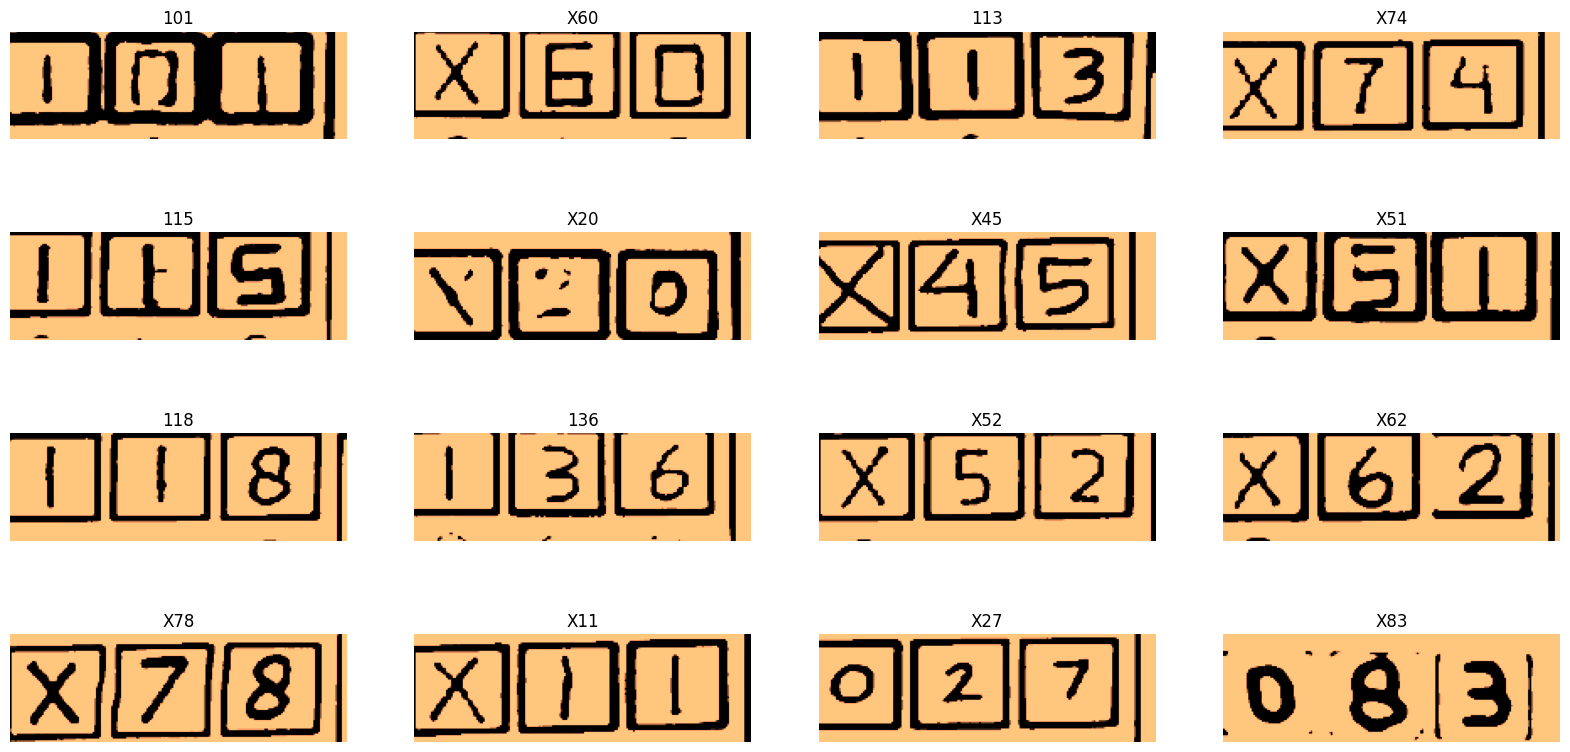

In [75]:
data_visualization(data=train_ds, cmap='copper')

# **Build a Model**

## **CTC Layer**

In [76]:
def reverse(x, axes):
    if isinstance(axes, int):
        axes = [axes]
    return tf.reverse(x, axes)

In [77]:
def ctc_label_dense_to_sparse(labels, label_lengths):
    label_shape = tf.shape(labels)
    num_batches_tns = tf.stack([label_shape[0]])
    max_num_labels_tns = tf.stack([label_shape[1]])

    def range_less_than(old_input, current_input):
        return tf.expand_dims(tf.range(tf.shape(old_input)[1]), 0) < tf.fill(
            max_num_labels_tns, current_input
        )

    init = tf.cast(tf.fill([1, label_shape[1]], 0), tf.bool)
    dense_mask = tf.compat.v1.scan(
        range_less_than, label_lengths, initializer=init, parallel_iterations=1
    )
    dense_mask = dense_mask[:, 0, :]

    label_array = tf.reshape(
        tf.tile(tf.range(0, label_shape[1]), num_batches_tns), label_shape
    )
    label_ind = tf.compat.v1.boolean_mask(label_array, dense_mask)

    batch_array = tf.transpose(
        tf.reshape(
            tf.tile(tf.range(0, label_shape[0]), max_num_labels_tns),
            reverse(label_shape, 0),
        )
    )
    batch_ind = tf.compat.v1.boolean_mask(batch_array, dense_mask)
    indices = tf.transpose(
        tf.reshape(tf.concat([batch_ind, label_ind], axis=0), [2, -1])
    )

    vals_sparse = tf.compat.v1.gather_nd(labels, indices)

    return tf.SparseTensor(
        tf.cast(indices, tf.int64), vals_sparse, tf.cast(label_shape, tf.int64)
    )

In [78]:
def ctc_batch_cost(y_true, y_pred, input_length, label_length):
    label_length = tf.cast(tf.squeeze(label_length, axis=-1), tf.int32)
    input_length = tf.cast(tf.squeeze(input_length, axis=-1), tf.int32)
    sparse_labels = tf.cast(
        ctc_label_dense_to_sparse(y_true, label_length), tf.int32
    )

    y_pred = tf.math.log(
        tf.transpose(y_pred, perm=[1, 0, 2]) + keras.backend.epsilon()
    )

    return tf.expand_dims(
        tf.compat.v1.nn.ctc_loss(
            inputs=y_pred, labels=sparse_labels, sequence_length=input_length
        ), 1,
    )

In [79]:
class CTCLayer(keras.layers.Layer):
    def __init__(self, **kwargs) -> None:
        super().__init__(**kwargs)
        self.loss_fn = ctc_batch_cost
        
    def compute_output_shape(self, input_shape):
        return (input_shape[0], 50, len(char_to_num.get_vocabulary()) + 1)
        
    def call(self, y_true, y_pred):
        batch_size = tf.cast(tf.shape(y_true)[0], dtype='int64')
        
        input_len = tf.cast(tf.shape(y_pred)[1], dtype='int64')
        label_len = tf.cast(tf.shape(y_true)[1], dtype='int64')
        
        input_len *= tf.ones(shape=(batch_size, 1), dtype='int64')
        label_len *= tf.ones(shape=(batch_size, 1), dtype='int64')
        
        loss = self.loss_fn(y_true, y_pred, input_len, label_len)
        self.add_loss(loss)
        
        return y_pred

## **OCR Model**

In [80]:
keras.backend.clear_session()

# Input
input_image = keras.layers.Input(
    shape=(200, 64, 1), 
    dtype=tf.float32,
    name='image'
)

input_label = keras.layers.Input(
    shape=(None, ), 
    dtype=tf.float32,
    name='label'
)

# CNN
cnn = keras.layers.Conv2D(
    filters=32,
    kernel_size=3,
    strides=(1, 1),
    padding='same',
    activation='relu',
    kernel_initializer='he_normal',
    bias_initializer=keras.initializers.Zeros(),
    name='conv_1',
)(input_image)

cnn = keras.layers.MaxPool2D(
    pool_size=(2, 2),
    name='pool_1'
)(cnn)

cnn = keras.layers.Conv2D(
    filters=64,
    kernel_size=3,
    strides=(1, 1),
    padding='same',
    kernel_initializer='he_normal',
    activation='relu',
    name='conv_2'
)(cnn)

cnn = keras.layers.MaxPool2D(
    pool_size=(2, 2),
    name='pool_2d'
)(cnn)

cnn = keras.layers.Reshape(
    target_shape=(200//4, (64//4)*64),
    name='reshape'
)(cnn)

cnn = keras.layers.Dense(
    units=64,
    activation='relu',
    kernel_initializer='he_normal',
    name='dense_1'
)(cnn)

cnn = keras.layers.Dropout(
    rate=0.2,
    name='dropout'
)(cnn)

# RNN
rnn = keras.layers.Bidirectional(
    keras.layers.RNN(
        cell=keras.layers.LSTMCell(
            units=128,
            dropout=0.25,
            name='rnn_1'
        ),
        return_sequences=True
    )
)(cnn)

rnn = keras.layers.Bidirectional(
    keras.layers.RNN(
        cell=keras.layers.LSTMCell(
            units=64,
            dropout=0.25,
            name='rnn_2'
        ),
        return_sequences=True
    )
)(cnn)

# Output
output = keras.layers.Dense(
    units=len(char_to_num.get_vocabulary()) + 1,
    activation='softmax',
    name='output'
)(rnn)

# CTC loss layer
output = CTCLayer(
    name='ctc_loss'
)(input_label, output)

ocr_model = keras.Model(
    inputs=[input_image, input_label],
    outputs=[output]
)

ocr_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 200, 64, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv_1 (Conv2D)                (None, 200, 64, 32)  320         ['image[0][0]']                  
                                                                                                  
 pool_1 (MaxPooling2D)          (None, 100, 32, 32)  0           ['conv_1[0][0]']                 
                                                                                                  
 conv_2 (Conv2D)                (None, 100, 32, 64)  18496       ['pool_1[0][0]']             

## **OCR Training**

In [81]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * keras.ops.exp(-0.1)

learning_rate = keras.callbacks.LearningRateScheduler(scheduler)
csvlogger = keras.callbacks.CSVLogger("log.csv")

In [82]:
ocr_model.compile(
    optimizer=keras.optimizers.Adam()
)

ocr_model_history = ocr_model.fit(
    x=train_ds,
    validation_data=valid_ds,
    epochs=100,
    callbacks=[
        csvlogger
    ]
)

Epoch 1/100
125/125 [==============================] - 44s 302ms/step - loss: 41.8325 - val_loss: 25.5901
Epoch 2/100
125/125 [==============================] - 28s 227ms/step - loss: 23.6889 - val_loss: 7.6179
Epoch 3/100
125/125 [==============================] - 19s 155ms/step - loss: 7.2435 - val_loss: 6.8651
Epoch 4/100
125/125 [==============================] - 19s 152ms/step - loss: 6.8209 - val_loss: 6.6617
Epoch 5/100
125/125 [==============================] - 19s 152ms/step - loss: 6.5368 - val_loss: 6.3971
Epoch 6/100
125/125 [==============================] - 20s 158ms/step - loss: 6.3445 - val_loss: 6.2220
Epoch 7/100
125/125 [==============================] - 20s 163ms/step - loss: 6.1779 - val_loss: 6.1501
Epoch 8/100
125/125 [==============================] - 21s 164ms/step - loss: 6.0039 - val_loss: 5.9719
Epoch 9/100
125/125 [==============================] - 21s 169ms/step - loss: 5.7647 - val_loss: 5.5745
Epoch 10/100
125/125 [==============================] - 22s 1

In [83]:
ocr_model.evaluate(valid_ds)
ocr_model.save("ocr_model.keras")

32/32 [==============================] - 2s 61ms/step - loss: 3.9679


# **Predictions**

## **Model Prediction**

In [84]:
ocr_pred_model = keras.Model(
    inputs=ocr_model.get_layer('image').output,
    outputs=ocr_model.get_layer('output').output
)

ocr_pred_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 200, 64, 1)]      0         
                                                                 
 conv_1 (Conv2D)             (None, 200, 64, 32)       320       
                                                                 
 pool_1 (MaxPooling2D)       (None, 100, 32, 32)       0         
                                                                 
 conv_2 (Conv2D)             (None, 100, 32, 64)       18496     
                                                                 
 pool_2d (MaxPooling2D)      (None, 50, 16, 64)        0         
                                                                 
 reshape (Reshape)           (None, 50, 1024)          0         
                                                                 
 dense_1 (Dense)             (None, 50, 64)            6560

In [85]:
@tf.function
def ctc_decode(y_pred, input_length, greedy=True, beam_width=100, top_paths=1):
    input_shape = tf.shape(y_pred)
    num_samples, num_steps = input_shape[0], input_shape[1]
    y_pred = tf.math.log(
        tf.transpose(y_pred, perm=[1, 0, 2]) + keras.backend.epsilon()
    )
    input_length = tf.cast(input_length, tf.int32)

    if greedy:
        (decoded, log_prob) = tf.nn.ctc_greedy_decoder(
            inputs=y_pred, sequence_length=input_length
        )
    else:
        (decoded, log_prob) = tf.compat.v1.nn.ctc_beam_search_decoder(
            inputs=y_pred,
            sequence_length=input_length,
            beam_width=beam_width,
            top_paths=top_paths,
        )
    decoded_dense = []
    for st in decoded:
        st = tf.SparseTensor(st.indices, st.values, (num_samples, num_steps))
        decoded_dense.append(tf.sparse.to_dense(sp_input=st, default_value=-1))
    return (decoded_dense, log_prob)

In [86]:
def decode_pred(pred_label):
    input_len = np.ones(shape=pred_label.shape[0]) * pred_label.shape[1]
    decode = ctc_decode(pred_label, input_length=input_len, greedy=True)[0][0][:, :3]
    chars = num_to_char(decode)
    texts = [tf.strings.reduce_join(inputs=char).numpy().decode('UTF-8') for char in chars]
    filtered_texts = [text.replace('[UNK]', " ").strip() for text in texts]
    return filtered_texts 

In [87]:
data = next(iter(valid_ds))
images = data['image']

model_pred = ocr_pred_model.predict(tf.expand_dims(images[5], axis=0))
print(f'Predicted: {decode_pred(model_pred)[0]}')

1/1 [==============================] - 3s 3s/step
Predicted: X75


1/1 [==============================] - 0s 83ms/step


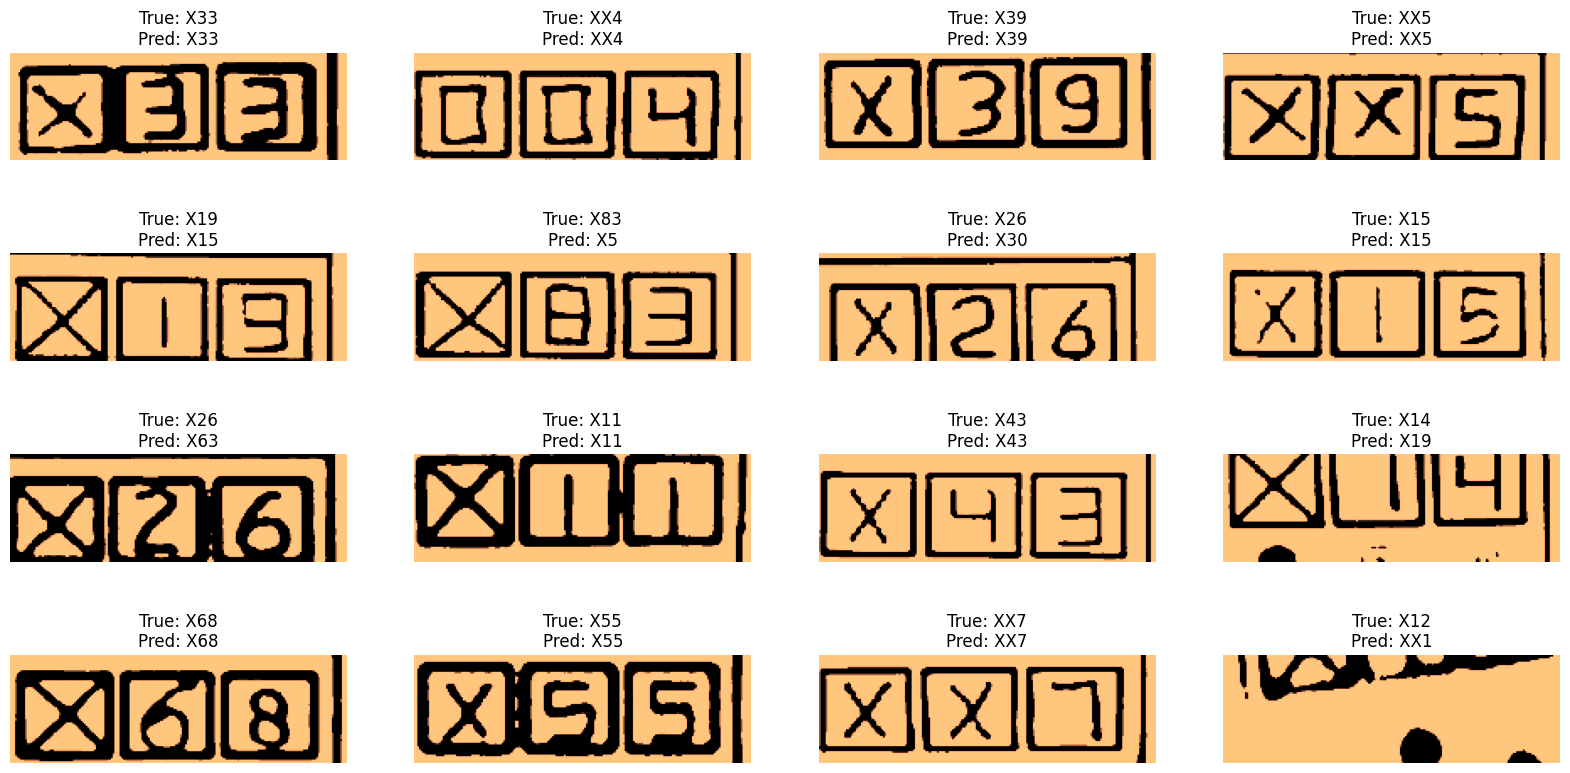

In [88]:
data_visualization(
    data=valid_ds.shuffle(1000),
    model=ocr_pred_model,
    decode_fn=decode_pred,
    cmap='copper'
)

## **Prediction in New Data**

In [89]:
TEST_SUARA01    = 'Test/suara01/'
TEST_SUARA02    = 'Test/suara02/'
TEST_SUARA03    = 'Test/suara03/'

In [90]:
def preprocess_img(path: str) -> tf.Tensor:
    image = tf.io.read_file(path)
    image = tf.image.decode_png(image, channels=1)
    image = tf.image.convert_image_dtype(image=image, dtype=tf.float32)
    image = tf.image.resize(images=image, size=(64, 200))
    image = tf.transpose(a=image, perm=[1, 0, 2])
    image = tf.cast(image, tf.float32)
    return {
        'image': image
    }

In [91]:
def sort_key(path):
    return int(path.split('\\')[1].split(".")[0].split('_')[1])

all_test01_paths = sorted(glob.glob(TEST_SUARA01 + "*"), key=sort_key)
all_test02_paths = sorted(glob.glob(TEST_SUARA02 + "*"), key=sort_key)
all_test03_paths = sorted(glob.glob(TEST_SUARA03 + "*"), key=sort_key)

In [92]:
test01_ds = tf.data.Dataset.from_tensor_slices((
    np.array(all_test01_paths)
)).map(
    map_func=preprocess_img, 
    num_parallel_calls=tf.data.experimental.AUTOTUNE
).batch(batch_size=len(all_test01_paths)).prefetch(tf.data.experimental.AUTOTUNE)

test02_ds = tf.data.Dataset.from_tensor_slices((
    np.array(all_test02_paths)
)).map(
    map_func=preprocess_img, 
    num_parallel_calls=tf.data.experimental.AUTOTUNE
).batch(batch_size=len(all_test02_paths)).prefetch(tf.data.experimental.AUTOTUNE)

test03_ds = tf.data.Dataset.from_tensor_slices((
    np.array(all_test03_paths)
)).map(
    map_func=preprocess_img, 
    num_parallel_calls=tf.data.experimental.AUTOTUNE
).batch(batch_size=len(all_test03_paths)).prefetch(tf.data.experimental.AUTOTUNE)

In [93]:
def predict_text(data, i):
    image = next(iter(data))['image']
    predictions = ocr_pred_model.predict(tf.expand_dims(image[i], axis=0))
    return decode_pred(predictions)[0]

In [94]:
hasil01 = []
for i in range(len(all_test01_paths)):
    hasil01.append(predict_text(test01_ds, i))

1/1 [==============================] - 0s 43ms/step


In [95]:
hasil02 = []
for i in range(len(all_test02_paths)):
    hasil02.append(predict_text(test02_ds, i))

1/1 [==============================] - 0s 40ms/step


In [96]:
hasil03 = []
for i in range(len(all_test03_paths)):
    hasil03.append(predict_text(test03_ds, i))

1/1 [==============================] - 0s 46ms/step


In [97]:
def data_visualization(data: tf.data.Dataset, model=None, decode_fn=None, grid=[6, 6], figsize=(20, 10), cmap='binary'):
    n_rows, n_cols = grid
    plt.figure(figsize=figsize)
    
    batch_data = next(iter(data))
    images = batch_data['image']
    
    if model is not None:
        pred_labels = decode_fn(model.predict(images))
        
    for image_number in range(n_rows * n_cols):
        plt.subplot(n_rows, n_cols, image_number + 1)
        image = tf.squeeze(images[image_number]).numpy()
        if model is not None:
            title = f'Pred: {pred_labels[image_number]}'
            plt.title(title)
        plt.imshow(tf.transpose(image), cmap=cmap)
        plt.axis('off')
        
    plt.show()

7/7 [==============================] - 1s 70ms/step


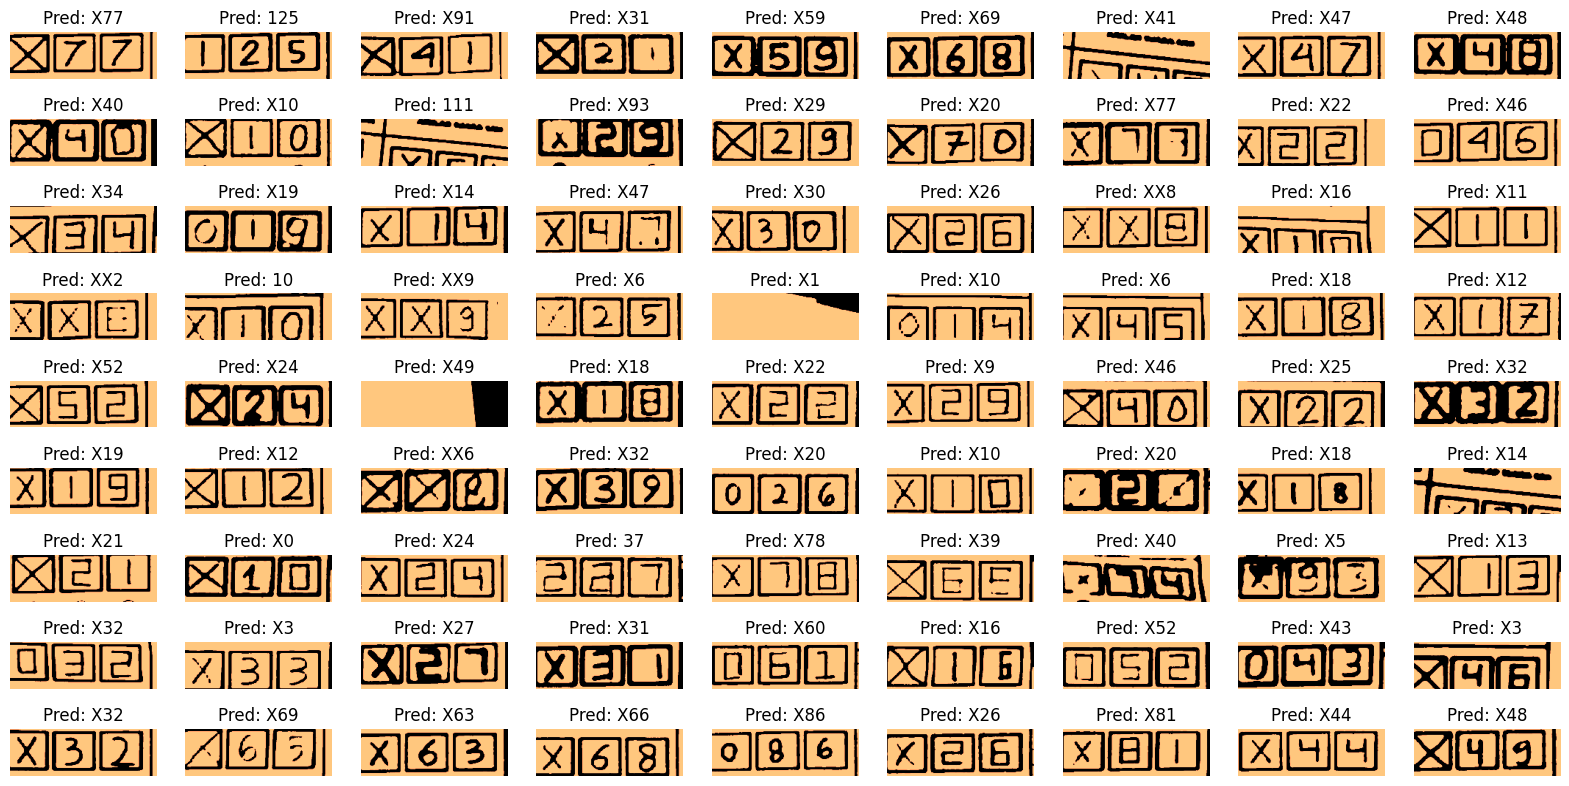

In [98]:
data_visualization(
    data=test01_ds.shuffle(1000),
    model=ocr_pred_model,
    decode_fn=decode_pred,
    grid=[9, 9],
    cmap='copper'
)

7/7 [==============================] - 1s 77ms/step


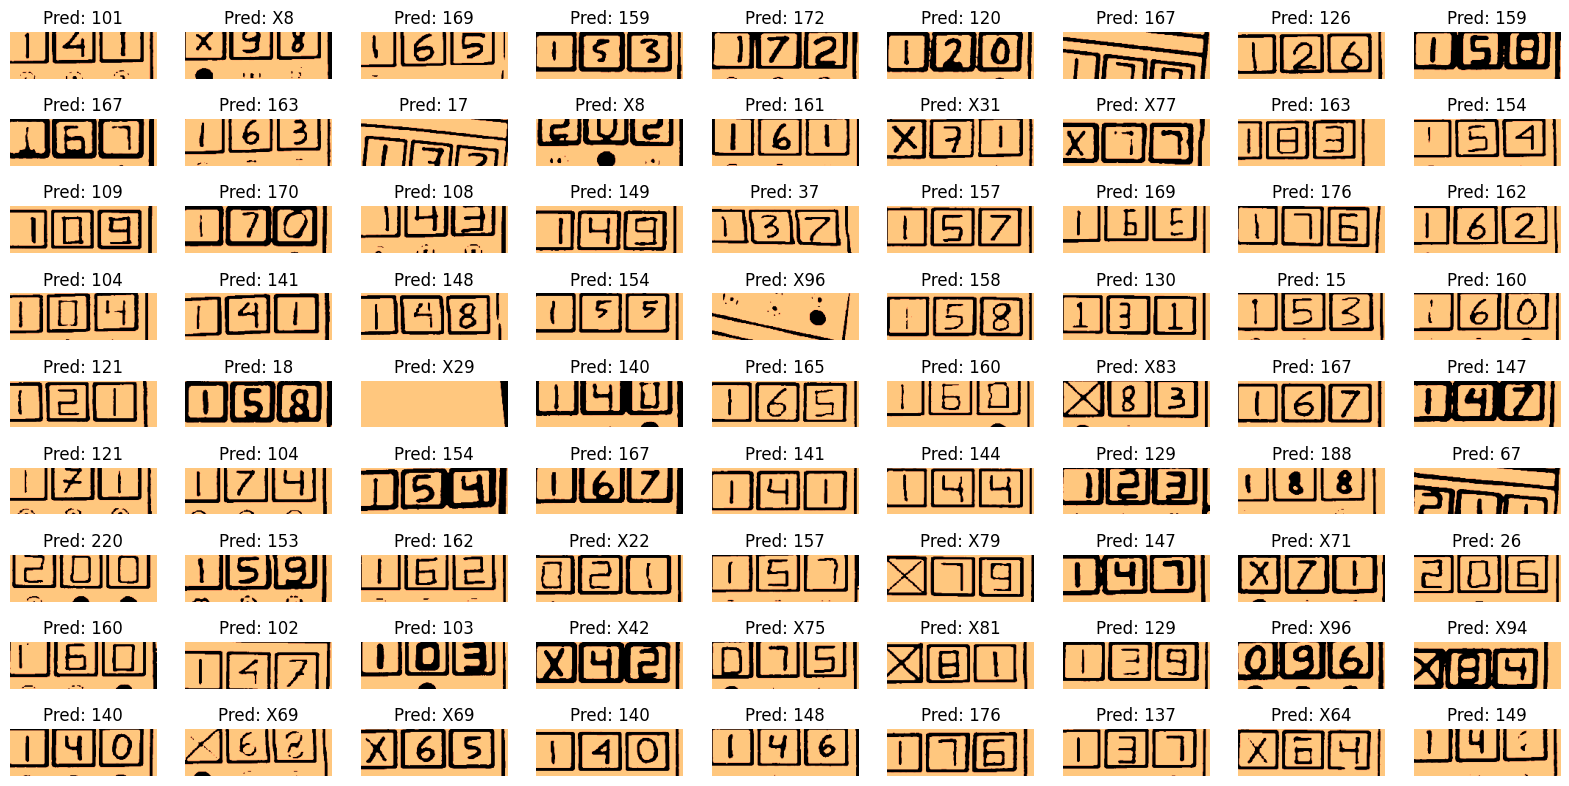

In [99]:
data_visualization(
    data=test02_ds.shuffle(1000),
    model=ocr_pred_model,
    decode_fn=decode_pred,
    grid=[9, 9],
    cmap='copper'
)

7/7 [==============================] - 0s 62ms/step


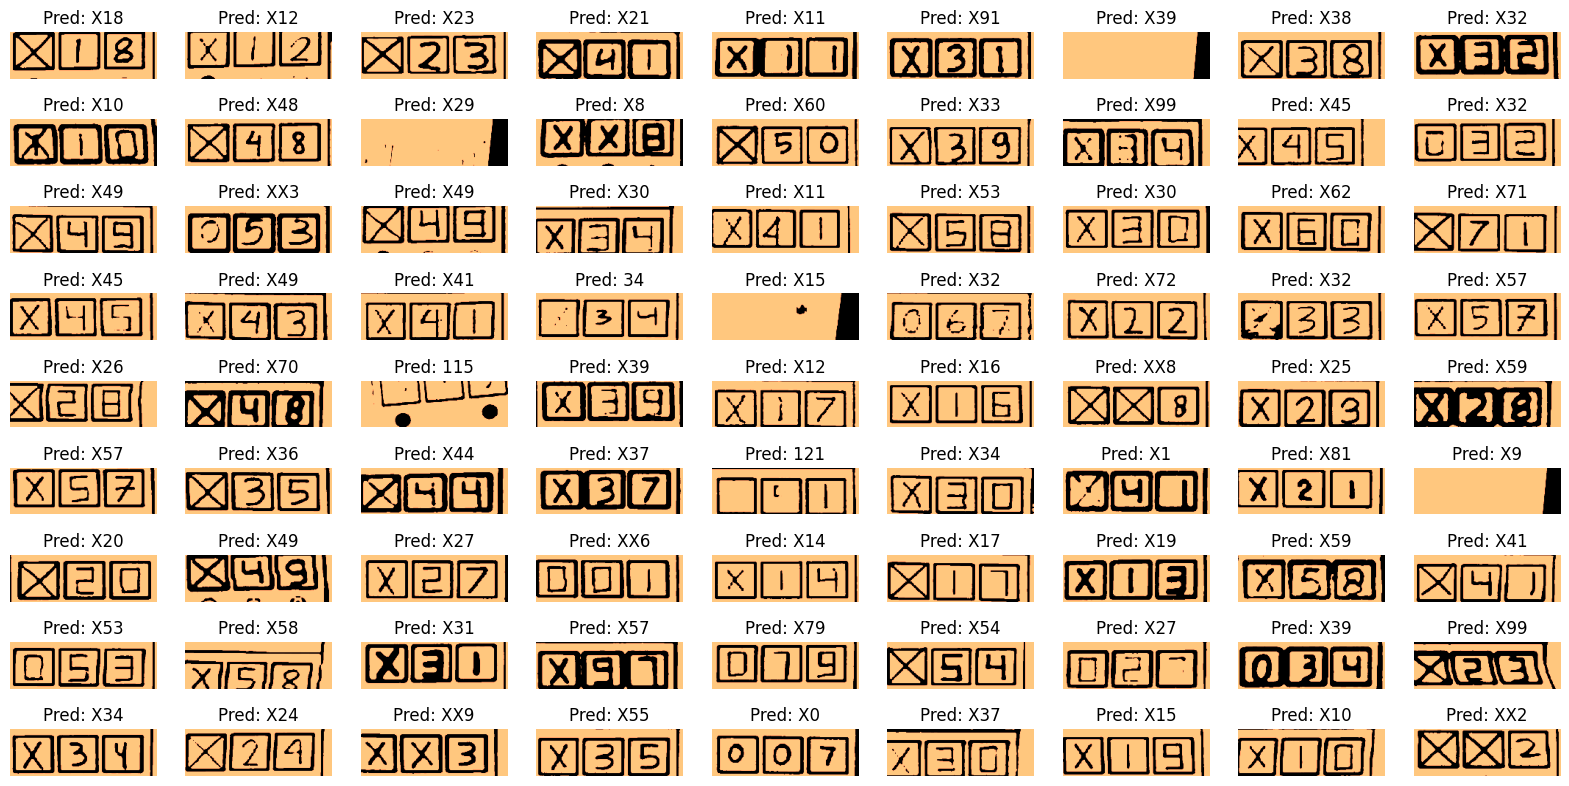

In [100]:
data_visualization(
    data=test03_ds.shuffle(1000),
    model=ocr_pred_model,
    decode_fn=decode_pred,
    grid=[9, 9],
    cmap='copper'
)

In [102]:
df = pd.read_csv('Submission/sample_submission.csv')
df = pd.DataFrame(
    data={
        "TPS": df['TPS'].tolist(),
        "Suara 01": hasil01,
        "Suara 02": hasil02,
        "Suara 03": hasil03
    }
)
df.to_csv("Rekap Suara Prediksi.csv", index=False)

In [104]:
df = pd.read_csv("Rekap Suara Prediksi.csv") 

df['Suara 01'] = df['Suara 01'].str.replace('X', '0').astype(np.int64) 
df['Suara 02'] = df['Suara 02'].str.replace('X', '0').astype(np.int64) 
df['Suara 03'] = df['Suara 03'].str.replace('X', '0').astype(np.int64)

def persentase_suara_02(df): 
    df['Persentase Suara Sah Paslon 2'] = (df['Suara 02'] / (df['Suara 01'] + df['Suara 02'] + df['Suara 03'])) * 100 
    return round(df, 4)

df = persentase_suara_02(df)
df = df[['TPS', 'Persentase Suara Sah Paslon 2']]

df.to_csv('submission.csv', index=False)